# PyTorch scheduler learning rate visualization

This notebook demostrates how are the learning rates changes of different kinds of PyTorch scheduler.

In [3]:
import plotly.express as px
import pandas as pd
import torch

def show_learning_rate_curve(scheduler_klass,
                             scheduler_parameters,
                             init_lr=0.1,
                             epochs=120):
    optimizer = torch.optim.SGD([torch.Tensor([1.0])], lr=init_lr)
    scheduler = scheduler_klass(optimizer, **scheduler_parameters)
    learning_rates = []
    epochs = range(epochs)
    for _ in epochs:
        optimizer.step()
        learning_rates.append(scheduler.get_last_lr()[0])
        scheduler.step()

    fig = px.line(
        pd.DataFrame({'Learning Rate': learning_rates, 'Epoch': epochs}),
        x="Epoch",
        y="Learning Rate",
        title=scheduler_klass.__name__,
        width=1200)
    fig.show()

# torch.optim.lr_scheduler.StepLR

https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.StepLR

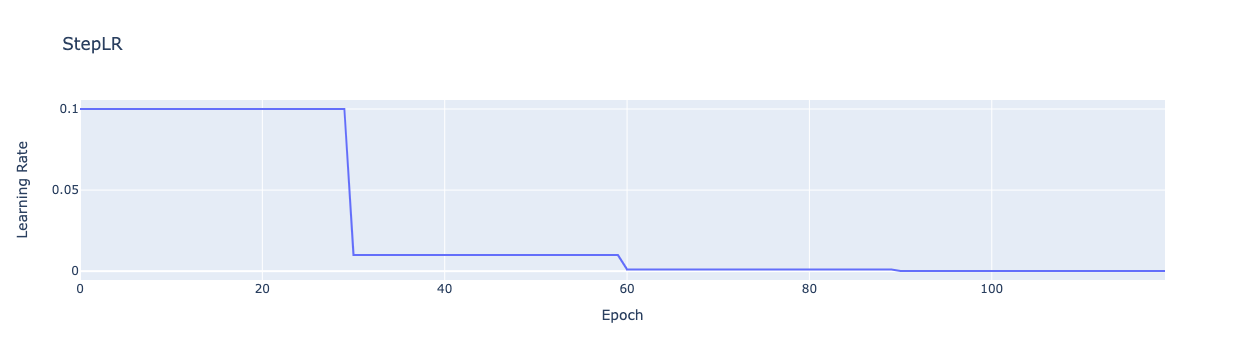

In [4]:
show_learning_rate_curve(
    torch.optim.lr_scheduler.StepLR,
    {'step_size': 30, 'gamma': 0.1}
)

# torch.optim.lr_scheduler.MultiStepLR

https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.MultiStepLR


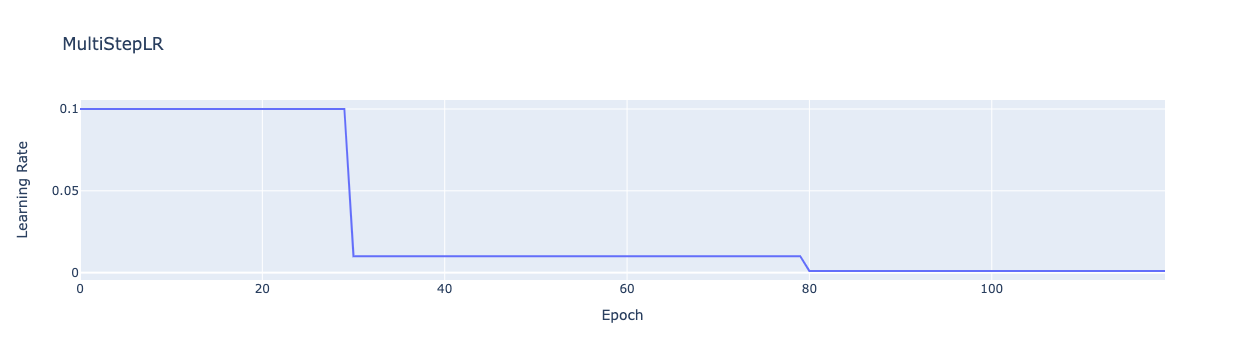

In [5]:
show_learning_rate_curve(
    torch.optim.lr_scheduler.MultiStepLR,
    {'milestones': [30, 80], 'gamma': 0.1}
)

# torch.optim.lr_scheduler.LambdaLR

https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.LambdaLR

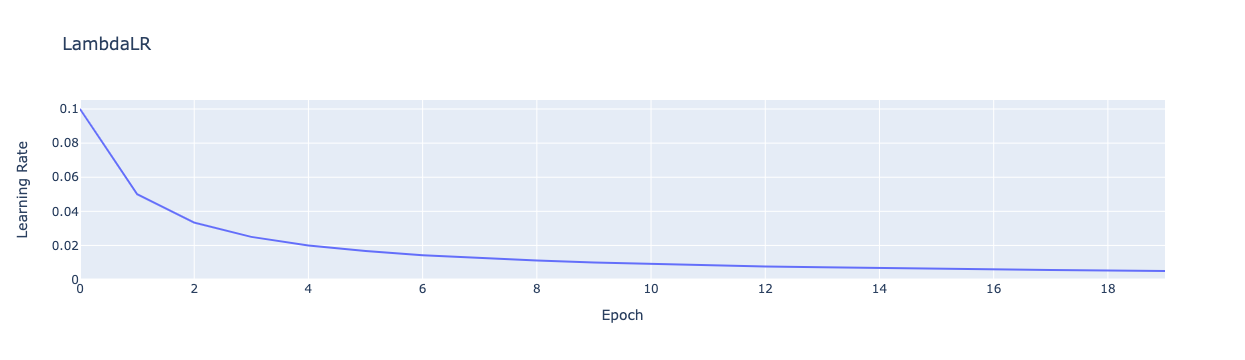

In [10]:
show_learning_rate_curve(
    torch.optim.lr_scheduler.LambdaLR,
    {'lr_lambda': lambda epoch: 1 / (epoch + 1)},
    epochs=20
)

# torch.optim.lr_scheduler.MultiplicativeLR

https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.MultiplicativeLR

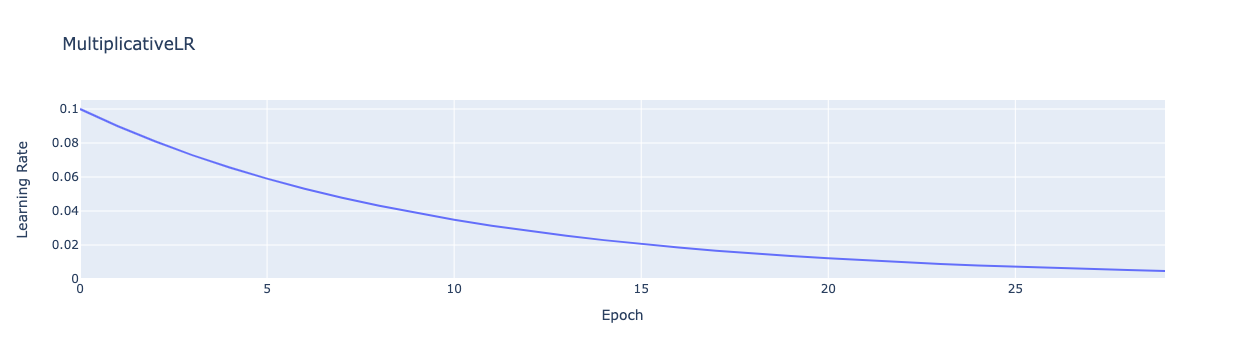

In [12]:
show_learning_rate_curve(
    torch.optim.lr_scheduler.MultiplicativeLR,
    {'lr_lambda': lambda epoch: 0.9},
    epochs=30
)

# 

# torch.optim.lr_scheduler.ExponentialLR

https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.ExponentialLR

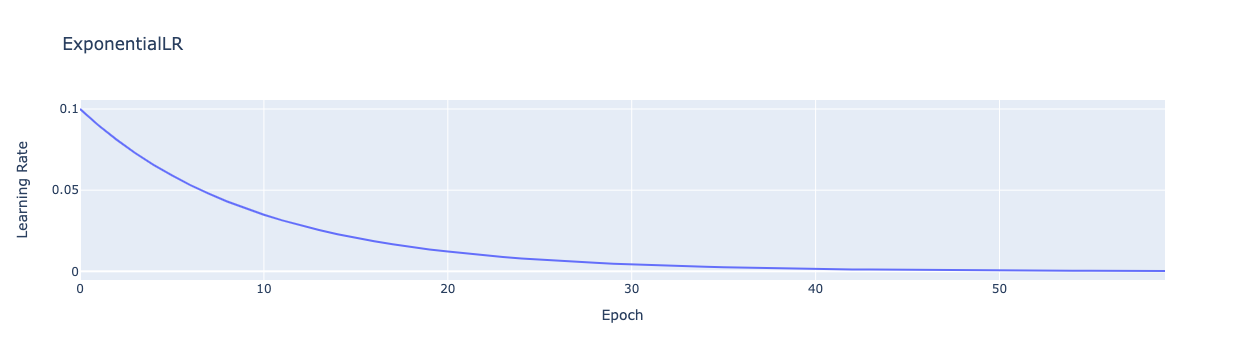

In [15]:
show_learning_rate_curve(
    torch.optim.lr_scheduler.ExponentialLR,
    {'gamma': 0.9},
    epochs=60
)

# torch.optim.lr_scheduler.CosineAnnealingLR

https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.CosineAnnealingLR

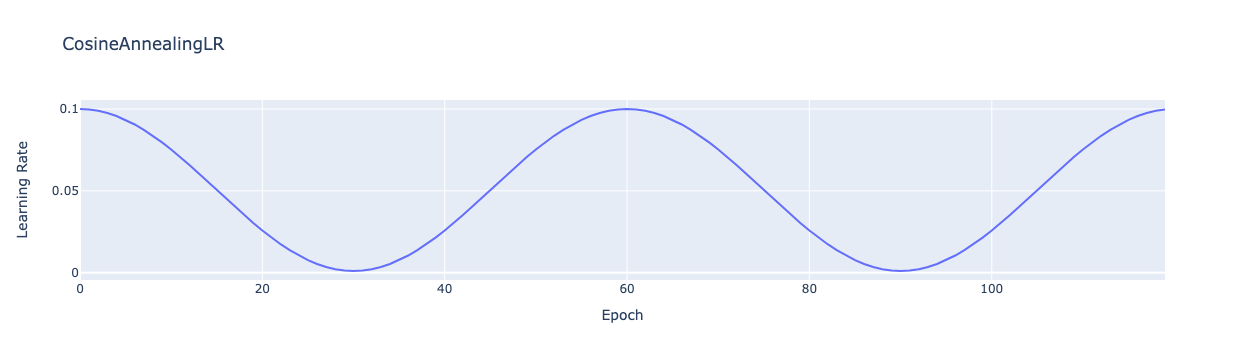

In [16]:
show_learning_rate_curve(
    torch.optim.lr_scheduler.CosineAnnealingLR,
    {'T_max': 30, 'eta_min': 0.001}
)

# torch.optim.lr_scheduler.CyclicLR

https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.CyclicLR

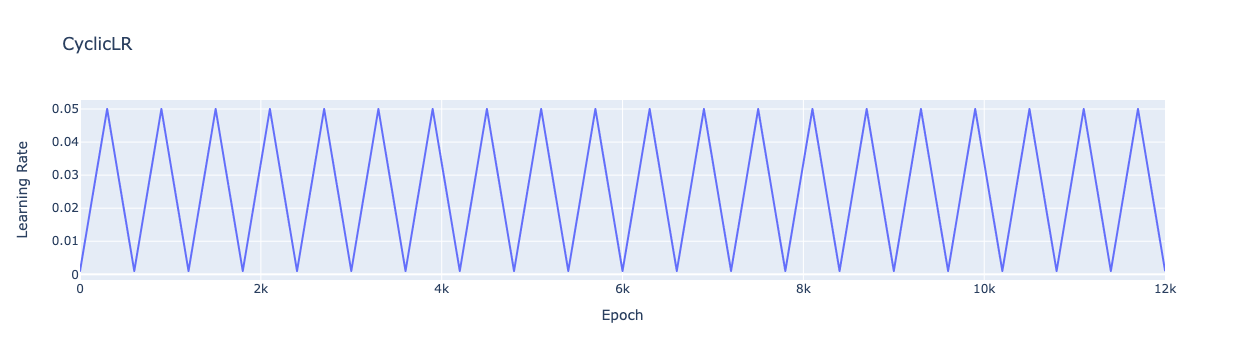

In [17]:
show_learning_rate_curve(
    torch.optim.lr_scheduler.CyclicLR,
    {'base_lr': 0.001, 
     'max_lr': 0.05, 
     'mode': 'triangular', 
     'step_size_up': 300},
    epochs=12000
)

# torch.optim.lr_scheduler.OneCycleLR

https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.OneCycleLR

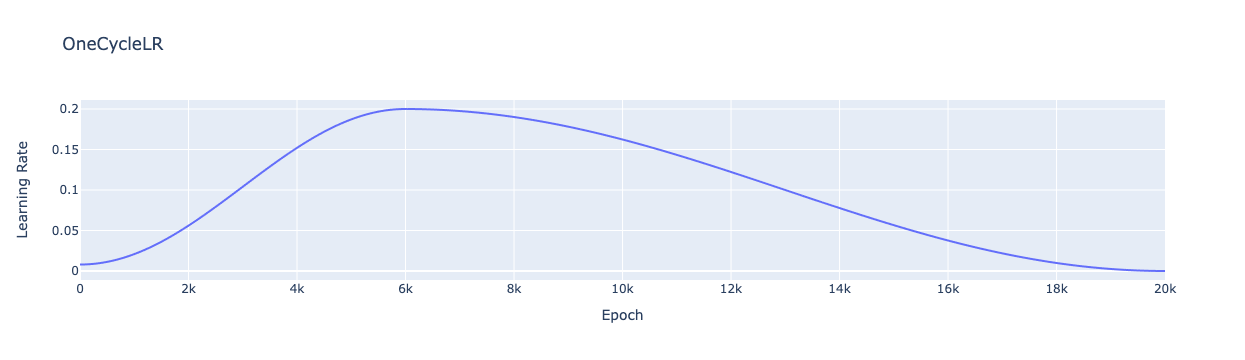

In [21]:
show_learning_rate_curve(
    torch.optim.lr_scheduler.OneCycleLR,
    {'max_lr': 0.2,
     'total_steps': 20000,
     'anneal_strategy': 'cos'},
    epochs=20000
)

# torch.optim.lr_scheduler.CosineAnnealingWarmRestarts

https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.CosineAnnealingWarmRestarts

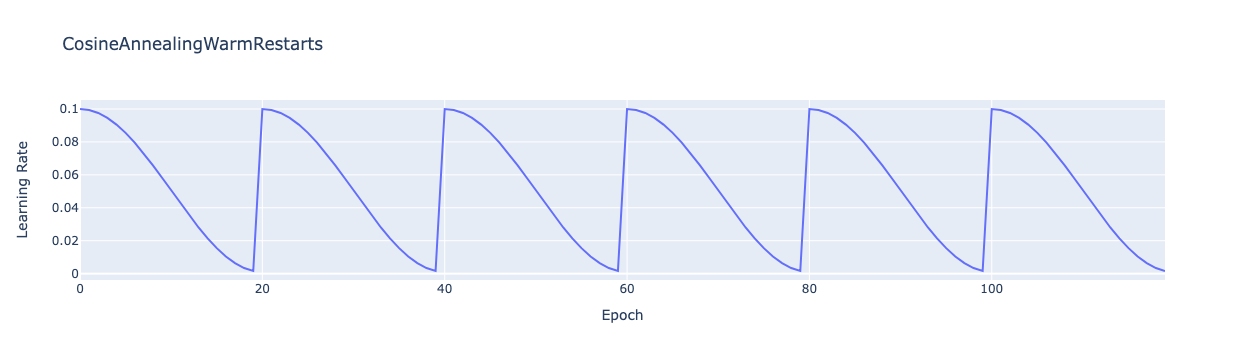

In [22]:
show_learning_rate_curve(
    torch.optim.lr_scheduler.CosineAnnealingWarmRestarts,
    {'T_0': 20,
     'T_mult': 1,
     'eta_min': 0.001},
)